# Решающие деревья

В этом ноутбуке мы рассмотрим, как использовать решающие деревья для решения задач регрессии и классификации.

In [ ]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Populating the interactive namespace from numpy and matplotlib


## 1. Решающее дерево для задачи регрессии

Оценим предсказательную способность решающего дерева  [на датасете](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) со стоимостью домов в Калифорнии.

Из описания данных по ссылке:

        - MedInc        Median income in block group
        - HouseAge      Median house age in block group
        - AveRooms      Average number of rooms per household
        - AveBedrms     Average number of bedrooms per household
        - Population    Block group population
        - AveOccup      Average number of household members
        - Latitude      Block group latitude
        - Longitude     Block group longitude

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y[:5]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Разобъём данные на тренировочную и тестовую части.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=241)

Обучим решающее дерево на тренировочных данных.

In [ ]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor()

Сделаем предсказание на тестовых данных.

In [ ]:
pred = model.predict(X_test)

Посчитаем качество модели с помощью метрики $R^2$.


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.6166961609680035

У деревьев, как и у линейных моделей, есть возможность узнать важность признаков (аналог весов у линейных моделей).

In [ ]:
model.feature_importances_

array([0.51312825, 0.04997578, 0.030812  , 0.02540409, 0.03238166,
       0.14137946, 0.10449298, 0.10242579])

Важности выдаются как набор значений. Эту информацию не очень удобно визуализировать, поэтому можно отобразить важности вместе с названиями признаков в виде гистограммы.

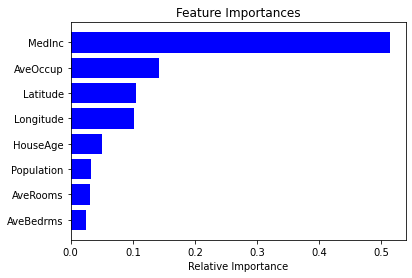

In [ ]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Подбор гиперпараметров модели

Подберём при помощи GridSearch глубину дерева (max_depth). Ограничение на максимальную глубину дерева — это своего рода регуляризация, которая не даёт дереву стать очень глубоким, а значит сложным, и подогнаться под данные.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : np.arange(1, 15)}

gs = GridSearchCV(model, params, cv=3, scoring='r2')

gs.fit(X, y)

print('best score:', gs.best_score_)
print('best params:', gs.best_params_)

best score: 0.5382896134247158
best params: {'max_depth': 5}


Проверим, помог ли подбор глубины дерева улучшить модель. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

pred = model.predict(X_test)

r2_score(y_test, pred)

0.6194746730178569

## 2. Решающее дерево для задачи классификации

Теперь будем решать задачу бинарной классификации: будем определять, болен человек или здоров.

Для начала загрузим данные и посмотрим на них.

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Посмотрим, сбалансированы ли классы.

In [ ]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

Нельзя сказать, что мы работаем с идеально сбалансированной выборкой, поэтому лучше не использовать accuracy в этой задаче.

В этой задаче будем измерять AUC-ROC, то есть площадь под ROC-кривой.

Сначала применим стандартный алгоритм действий:
*  разобъём данные на тренировочную и тестовую части;
*  обучим решающее дерево на тренировочных данных;
*  сделаем предсказание на тестовых данных.

Обратите внимание: для измерения ROC-AUC нам необходимы не сами классы, а их вероятности, поэтому будем использовать метод predict_proba, а не predict.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred = model.predict_proba(X_test)[:,1]

Теперь построим ROC-кривую и вычислим AUC-ROC.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred)

Text(0, 0.5, 'tpr')

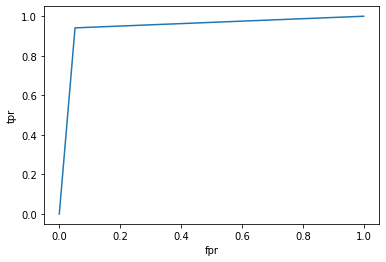

In [ ]:
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.9447261663286004

Попробуем улучшить качество путём подбора гиперпараметров.

Будем искать:
*  глубину дерева (max_depth);
*  критерий информативности, используемый для построения дерева.

In [ ]:
params = {'max_depth' : np.arange(1, 15),
          'criterion' : ['gini', 'entropy']}

gs = GridSearchCV(model, params, cv=3, scoring='roc_auc')

gs.fit(X, y)

print('best score:', gs.best_score_)
print('best params:', gs.best_params_)

best score: 0.9514332493560804
best params: {'criterion': 'entropy', 'max_depth': 3}


Проверим, помог ли подбор гиперпараметров улучшить качество предсказания на тестовых данных.

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

model.fit(X_train, y_train)

pred = model.predict_proba(X_test)[:,1]

Text(0, 0.5, 'tpr')

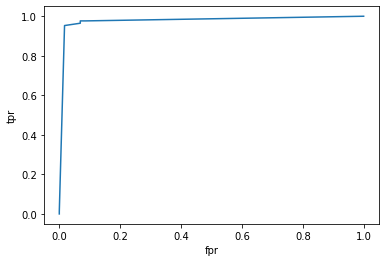

In [ ]:
fpr, tpr, _ = roc_curve(y_test, pred)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [ ]:
roc_auc_score(y_test, pred)

0.977789046653144

Оценим важность признаков.

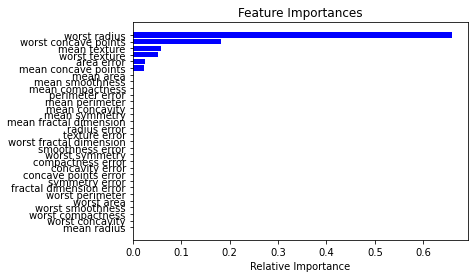

In [ ]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Выводы

* Мы видим, что решающие деревья могут довольно неплохо справляться и с задачами регрессии, и с задачами классификации.

* Кроме того, подбор гиперпараметров нередко улучшает качество предсказания.
Кстати говоря, у деревьев есть ещё несколько гиперпараметров, которые тоже можно подбирать (ознакомиться с ними можно [в документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).
В частности, полезно подбирать следующие гиперпараметры:

  - min_samples_split — минимальное число объектов в вершине для того, чтобы разбивать её дальше;
  - min_samples_leaf — минимальное число объектов, которое должно быть в листе;
  - max_features — максимальное число признаков, из которых мы ищем наилучшее разбиение в вершине;
  - class_weight — веса классов.

* Также не забывайте, что при подсчёте метрики ROC-AUC необходимо предсказывать вероятности классов, а не сами классы. С предсказанными классами метрика тоже посчитается, но, скорее всего, будет ниже, чем если предсказывать вероятности.